In [54]:
import numpy as np
from fiberamp.fiber.microstruct.bragg import Bragg, BraggExact
from step_exact import plotlogf
from scipy.optimize import newton
from ngsolve.webgui import Draw
import ngsolve as ng

In [81]:
i=0
n_air = 1.00027717
n_glass = 1.4388164768221814
n_poly = 1.5 - .001j
wls = np.linspace(1.4, 2, 301) * 1e-6

ts = [15*2.7183333333333333e-6, 15*2/3*1e-6, 15*2.7183333333333333e-6,
      15*2e-6, 15*2e-6]
ns = [lambda x: n_air, lambda x: n_glass, lambda x: n_poly,
      lambda x: n_air, lambda x: n_air]
mats = ['air', 'glass', 'polymer', 'buffer', 'Outer']
maxhs = [.2, .02, .01, .08, .1]
scale = 15e-6

a = Bragg(ts=ts, scale=scale, maxhs=maxhs, ns=ns,
          mats=mats, ref=0, wl=wls[i])


ModeSolver: Checking if mesh has required regions
Mesh has  56117  elements,  28088  points,  and  84204  edges.


In [82]:
Draw(a.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

# Exact Modes

In [83]:
A = BraggExact(ts=ts[:-1], scale=scale, maxhs=maxhs[:-1], ns=ns[:-1],
          mats=mats[:-1], ref=0, wl=3.3e-6)

In [84]:
k_low=A.ks[0].real * A.scale
nu=1
outer='h2'

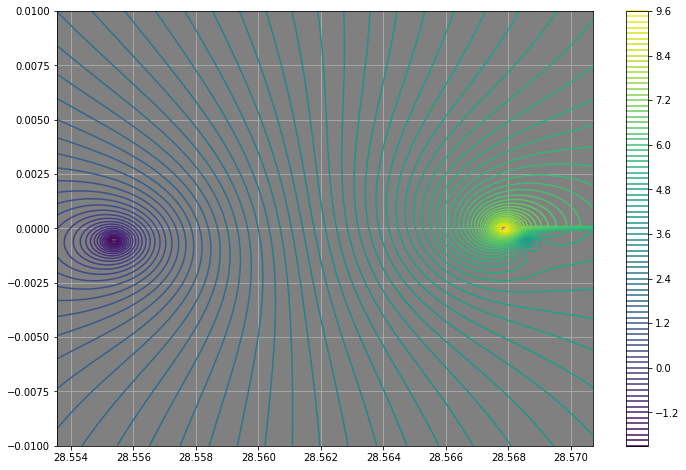

In [85]:
plotlogf(A.determinant, .9995*k_low, 1.0001*k_low, -.01,.01, nu, outer,
         iref=100, rref=100, levels=100)

In [86]:
guess = np.array(.9999*k_low)

beta = newton(A.determinant, guess, args=(nu, outer), tol = 1e-15)

print("Scaled beta: ", beta, ". Residual of determinant: ", abs(A.determinant(beta, nu, outer)))


Scaled beta:  (28.555386672048094-0.0005750698976597465j) . Residual of determinant:  2.199622920005239e-12


In [87]:
Fs = A.all_fields(beta, nu, outer)

In [88]:
Draw(1e1*Fs['Ez'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [95]:
p=5
fes = ng.H1(a.mesh, order=p, complex=True,)

In [96]:
gfu = ng.GridFunction(fes)
gfu.Set(Fs['Ez'])

In [97]:
Draw(gfu, a.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [16]:

# Set result arrays
nspan = 4
betas = np.zeros(nspan, dtype=complex)

# Get exact search centers

# Embedding parameter array
wls = np.linspace(1.4, 2, 301) * 1e-6

# PML strength
alpha = 5


In [18]:
centers = np.load('exact_betas/k_001_scaled_betas.npy')

centers = a.sqrZfrom(centers/a.L).conjugate()
center = centers[i]
radius = 0.2
npts = 4

beta, _, Es, phis, _ = a.leakyvecmodes(ctr=center,
                                    rad=radius,
                                    alpha=alpha,
                                    nspan=nspan,
                                    npts=npts,
                                    p=0,
                                    niterations=10,
                                    nrestarts=0,
                                    stop_tol=1e-9,)


Set NGSolve automatic PML with alpha= 5 and thickness=2.000
Using FEAST to search for vector leaky modes in
circle of radius 0.2 centered at  (0.7612037599028554-0.019013418546906607j)
assuming not more than 4 modes in this interval
System size: 101401  x  101401   Inverse type: umfpack

SpectralProj: Setting shifted trapezoidal rule quadrature on circular contour
SpectralProj: Radius=0.2, Center=0.761204-0.0190134j
SpectralProjNGR:   Making resolvent at z =  +0.903 +0.122j
SpectralProjNGR:   Making resolvent at z =  +0.620 +0.122j
SpectralProjNGR:   Making resolvent at z =  +0.620 -0.160j
SpectralProjNGR:   Making resolvent at z =  +0.903 -0.160j

=========== Starting FEAST iterations ===========
Trying with 4 vectors:

 ITERATION 1 with 4 vectors and 4 left vectors
   During kernel cleaning abs(g):
   [3.1e+00 3.1e-01 6.1e-04 1.4e-03]
   Real part of computed eigenvalues:
   [0.7852347  0.78813508 0.96385778 1.02835699]
   Imag part of computed eigenvalues:
   [ 0.00466489  0.0141128

In [19]:
for e in Es:
    Draw(e.real, a.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

In [20]:
for phi in phis:
    Draw(phi, a.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…